In [1]:
import sympy as sym
import pandas as pd
import matplotlib as mpl
from scipy import special
import numpy as np
from scipy.optimize import minimize
from sympy.stats import Normal, Laplace, E
from sympy.utilities.lambdify import lambdastr

In [2]:
from sympy.abc import k, m

In [3]:
sym.init_printing()
%matplotlib inline
mpl.pyplot.style.use(['seaborn-dark-palette', 'seaborn-poster'])

In [4]:
x, z, y = sym.symbols('x z y', positive=True, real=True)

In [5]:
sigma, gamma, Delta = sym.symbols('sigma gamma Delta', positive=True, real=True)

In [6]:
erfcx = sym.erfc(x) * sym.exp(x**2)

In [7]:
sym.limit(x * erfcx, x, sym.oo)

In [8]:
abs_gauss_dens = (sym.sqrt(2) / (sigma * sym.sqrt(Delta * sym.pi))) * sym.exp(-x**2 / (2 * Delta * sigma**2))

In [38]:
eps_dens = sym.sqrt(2)  * (sym.sqrt(Delta ) * gamma)**(-1) * sym.exp(-x * sym.sqrt(2) / (sym.sqrt(Delta) * gamma))

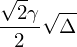

In [60]:
sym.integrate(x * eps_dens, (x, 0, sym.oo))

In [42]:
prop = eps_dens / (abs_gauss_dens + eps_dens)

In [43]:
joint_var = sym.integrate((x**2 *  (abs_gauss_dens + eps_dens)).replace(x, sym.sqrt(x)) / 2, (x, z, sym.oo))

In [44]:
lap_var = sym.integrate((x**2 *  eps_dens).replace(x, sym.sqrt(x)) / 2, (x, z, sym.oo))

In [45]:
var_prop = (lap_var / joint_var).replace(Delta,1)

In [46]:
sym.limit(eps_dens / (eps_dens + abs_gauss_dens), x, sym.oo)

In [47]:
diffusion_greater = sym.integrate(sym.integrate((x-y) * eps_dens * abs_gauss_dens.replace(x,y), (x, y, sym.oo)),
                                  (y, 0, sym.oo))

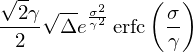

In [48]:
diffusion_greater.simplify()

In [49]:
jumps_greater = sym.integrate(sym.integrate((y-x) * eps_dens * abs_gauss_dens.replace(x,y), (y, x, sym.oo)),
                                  (x, 0, sym.oo))

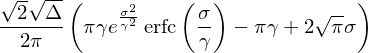

In [50]:
jumps_greater.simplify()

In [ ]:
B =  sym.exp(sigma**2 / (2 * kappa**2)) * sym.erfc(sigma / (sym.sqrt(2) * kappa))

In [ ]:
val = (sym.sqrt(2 / sym.pi) * sigma * sym.sqrt(Delta) - kappa * sym.sqrt(Delta) * (1-B))

In [ ]:
part_diff_var = sym.integrate( x**2 * abs_diff_dens, (x, 0, Delta**y)).simplify() 

In [ ]:
part_diff_var

In [ ]:
sym.limit((part_diff_var / Delta).simplify(), Delta, 0)

In [ ]:
part_lap_var = sym.integrate( x * eps_dens, (x, 0, sym.oo)).simplify() 

In [ ]:
part_lap_var

In [ ]:
sym.limit(part_lap_var / Delta, Delta, 0)

In [ ]:
epsilon = sym.symbols('epsilon', postive=True, real=True)

In [ ]:
sym.integrate(sym.integrate(eps_dens.replace(x,y) * eps_dens, (x, epsilon, sym.oo)),
              (y, epsilon, sym.oo))